# Project 2 - Ames Housing Data and Kaggle Challenge

# <span  style='color:blue'> Import packages </span>

In [25]:
# to IO/manipulate/calculate dataframes
import pandas as pd
import numpy as np

# to do math/statisctics
import statistics as stat
import math

# to vitualize data
import matplotlib.pyplot as plt
import seaborn as sns


# to do modeling with sklrean
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# other packages
import warnings
warnings.filterwarnings(action='ignore')

# <span style='color: blue'> Define functions </span>

# Visulaization functions

## FUNCTION:  Plot heatmap of Pearson correlation

In [26]:
def plot_heatmap(dataset, 
                title=False):
    """
    input: 
    dataset which can be the whole dataframe e.g., df
    or it can be some features e.g., df[['var1','var2']]
    """
    plt.figure(figsize=(10,10))
    sns.set(font_scale = 1.3)

    sns.set_style('darkgrid')
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    corr = dataset.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr,
                annot=True,
                cmap='coolwarm',
               mask=mask);
    if title != False: 
        plt.title(title,fontsize=16)

##  FUNCTION:  Plot pairplot

In [27]:
def plot_pairplot(dataset,features):
    """kjhkjhkjhjkh"""
    plt.figure(figsize=(10,10))
    sns.set_style('darkgrid')
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    sns.set( font_scale = 1.3)
    sns.pairplot(dataset[features],corner=True);

##  FUNCTION:  plot_swarmplot_category

In [28]:
def plot_swarmplot_category(dataset, category_features=None):
    if category_features==None:
        category_features = [col for col in dataset.columns if dataset[col].dtype==np.object_]
    size_title=26
    size_subtitle=14
    size_label_xy=15
    sns.set(style="white")

    fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(12, 50))
    # fig.subplots_adjust(hspace=4)
    fig.suptitle('Train Dataset\n\n\n', fontsize=size_title,  fontweight='bold', fontname='Ubuntu')

    for ax, feature in zip(axes.flatten(), dataset[category_features]):
        my_order = dataset.groupby(by=[feature])['sale_price'].mean().sort_values().index
        sns.swarmplot(ax=ax, y=dataset[feature], x=dataset['sale_price']/1000, order=list(my_order[::-1]))
        ax.tick_params(axis='both', labelsize=size_label_xy)
        ax.set_title(feature.upper().replace('_',' '), fontsize=18,  fontweight='normal', fontname='Ubuntu')
        ax.set_ylabel(' ',fontsize=size_label_xy)
        ax.set_xlabel('Sale Price k[$]',fontsize=size_label_xy)
        ax.set(xlim=None, ylim=None)
        ax.grid(b=True, which='major', axis='both')

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    plt.tight_layout();
    # plt.savefig('seaborn-style.svg', bbox_inches='tight')

## FUNCTION: plot_barplot_category

In [29]:
def plot_barplot_category(dataset, category_features=None):
    if category_features==None:
        category_features = [col for col in dataset.columns if dataset[col].dtype==np.object_]
    size_title=26
    size_subtitle=14
    size_label_xy=15
    sns.set(style="white")

    fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(12, 50))
    # fig.subplots_adjust(hspace=4)
    fig.suptitle('Train Dataset\n\n\n', fontsize=size_title,  fontweight='bold', fontname='Ubuntu')

    for ax, feature in zip(axes.flatten(), dataset[category_features]):
        my_order = dataset.groupby(by=[feature])['sale_price'].mean().sort_values().index
        sns.barplot(ax=ax, y=dataset[feature], x=dataset['sale_price']/1000, order=list(my_order[::-1]))
        ax.tick_params(axis='both', labelsize=size_label_xy)
        ax.set_title(feature.upper().replace('_',' '), fontsize=18,  fontweight='normal', fontname='Ubuntu')
        ax.set_ylabel(' ',fontsize=size_label_xy)
        ax.set_xlabel('Sale Price k[$]',fontsize=size_label_xy)
        ax.set(xlim=None, ylim=None)
        ax.grid(b=True, which='major', axis='both')

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    plt.tight_layout();
    # plt.savefig('seaborn-style.svg', bbox_inches='tight')

## FUNCTION: plot_boxplot_category

In [30]:
def plot_boxplot_category(dataset, category_features=None):
    if category_features==None:
        category_features = [col for col in dataset.columns if dataset[col].dtype==np.object_]
    size_title=26
    size_subtitle=14
    size_label_xy=15
    sns.set(style="white")

    fig, axes = plt.subplots(nrows=int(1+len(category_features)/3), ncols=3,
                             figsize=(12, int(1.5*len(category_features))))
    # fig.subplots_adjust(hspace=4)
    fig.suptitle('Train Dataset\n\n\n', fontsize=size_title,  fontweight='bold', fontname='Ubuntu')

    for ax, feature in zip(axes.flatten(), dataset[category_features]):
        my_order = dataset.groupby(by=[feature])['sale_price'].mean().sort_values().index
        sns.boxplot(ax=ax, y=dataset[feature], x=dataset['sale_price']/1000, order=list(my_order[::-1]))
        ax.tick_params(axis='both', labelsize=size_label_xy)
        ax.set_title(feature.upper().replace('_',' '), fontsize=18,  fontweight='bold', fontname='Ubuntu')
        ax.set_ylabel(' ',fontsize=size_label_xy)
        ax.set_xlabel('Sale Price k[$]',fontsize=size_label_xy)
        ax.set(xlim=(0, 600), ylim=None)
        ax.grid(b=True, which='major', axis='both')

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    plt.tight_layout();
    # plt.savefig('seaborn-style.svg', bbox_inches='tight')

# FUNCTION: plot_scatter_values

In [31]:
def plot_scatter_values(dataset, category_features=None, remove_zeros=False):
    if category_features==None:
        category_features = [col for col in dataset.columns if dataset[col].dtype==np.float64]
    size_title=26
    size_subtitle=14
    size_label_xy=15
    sns.set(style="white")

    fig, axes = plt.subplots(nrows=int(1+len(category_features)/3), ncols=3,
                             figsize=(12, int(1.8*len(category_features))))
    # fig.subplots_adjust(hspace=4)
    fig.suptitle('Train Dataset\n\n\n', fontsize=size_title,  fontweight='bold', fontname='Ubuntu')

    for ax, feature in zip(axes.flatten(), dataset[category_features]):
#         if remove_zeros==True:
#             dataset=dataset[dataset[feature]>0]
        sns.scatterplot(ax=ax, y=dataset[feature], x=dataset['sale_price']/1000)
#         sns.kdeplot(ax=ax, y=dataset[feature], x=dataset['sale_price']/1000,
#                     n_levels=3, cmap='PiYG', thresh=0.5)
        
        ax.tick_params(axis='both', labelsize=size_label_xy)
        ax.set_title(feature.upper().replace('_',' '), fontsize=18,  fontweight='bold', fontname='Ubuntu')
        ax.set_ylabel(' ',fontsize=size_label_xy)
        ax.set_xlabel('Sale Price k[$]',fontsize=size_label_xy)
        ax.set(xlim=(0, 600), ylim=None)
        ax.grid(b=True, which='major', axis='both')

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    plt.tight_layout();
    # plt.savefig('seaborn-style.svg', bbox_inches='tight')

# FUNCTION: plot_Heatmap

In [32]:
def plot_heatmap(dataset, category_features=None, remove_zeros=False):
    if category_features==None:
        category_features = [col for col in dataset.columns if dataset[col].dtype==np.float64]
    size_title=26
    size_subtitle=14
    size_label_xy=15
    sns.set(style="white")

    fig, ax = plt.subplots(nrows=1, ncols=1)
    # fig.subplots_adjust(hspace=4)
    fig.suptitle('Train Dataset\n\n\n', fontsize=size_title,  fontweight='bold', fontname='Ubuntu')


    sns.heatmap( dataset[category_features].corr())
#         sns.kdeplot(ax=ax, y=dataset[feature], x=dataset['sale_price']/1000,
#                     n_levels=3, cmap='PiYG', thresh=0.5)

    ax.tick_params(axis='both', labelsize=size_label_xy)
#     ax.set_title(feature.upper().replace('_',' '), fontsize=18,  fontweight='bold', fontname='Ubuntu')
    ax.set_ylabel(' ',fontsize=size_label_xy)
    ax.set_xlabel('Sale Price k[$]',fontsize=size_label_xy)
    ax.set(xlim=(0, 600), ylim=None)
    ax.grid(b=True, which='major', axis='both')

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    plt.tight_layout();
    # plt.savefig('seaborn-style.svg', bbox_inches='tight')

In [33]:
# plot_heatmap(train_df)

##  FUNCTION:  Count number of nulls/missing in each column 

In [34]:
def check_nulls(dataset):
    """
    This function read the dataset and report the following:
    1. column names with null
    2. null count 
    3. null count % 
    4. the first 10 element of each
    """
    xlist=[]
    for col in dataset.columns:
        number_of_nulls = dataset[col].isnull().sum()
#         print(col,number_of_nulls)
        if number_of_nulls!=0:
            xlist.append((col,number_of_nulls,
                          round(number_of_nulls*100/len(train_df),1) ,dataset[col][0:10].values))
    null_data = pd.DataFrame(data=xlist,columns=['column name','null count',
                                            'null count %','values example'])
    return null_data
# COMMENT: LIST comprehensition

In [35]:
# null1 = check_nulls(train_df[columns_to_dummy[0:5]])

##  FUNCTION:  Replace the Null elements with the column's mean

In [36]:
def replace_null_with_mean(dataset, feature_list):
    """
    Calculate the mean of each column in a dataset and replace nulls with the column's mean
    """
    [ dataset[feature].fillna(dataset[feature].mean(),inplace=True) for feature in feature_list ]

## FUNCTION: Replace the Null elements with the column's mean

In [37]:
def replace_null_with_mode(dataset, feature_list):
    """
    1. To find the most frequent element in the column with object type
    2. Replace the np.nan with the mode
    """
    [dataset[feature].fillna(stat.mode(dataset[feature]), inplace=True) for feature in feature_list]

## FUNCTION: print_dataset

In [38]:
def print_dataset(dataset):
    with pd.option_context('display.max_rows', 7, 'display.max_columns', None): 
        display(dataset)    

## FUNCTION: print_dataset_Type

In [39]:
def print_dataset_type(dataset):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(dataset.dtypes)

# <span style='color:Red'> Phase 2: Exploratory Data Analysis  </span>

# plot data

In [98]:
train_df = pd.read_csv( '../datasets/train_df_cleaned.csv' , index_col = 0)

In [99]:
print_dataset(train_df)

,Id,Lot Frontage,Lot Area,Land Slope,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool QC,Fence,Misc Val,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Garage Age,Age,remodel age
0,109,69.0552,13517,1,1976,2005,289.0,3,2,3,2,2,0,6,533.0,1,0.0,192.0,725.0,4,725,754,1479,0.0,0.0,2,1,3,1,3,6,0,0,1976.0,2,2.0,475.0,2,2,3,0,44,0,0,0,0,0,2010,130500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [100]:
check_nulls(train_df)

,column name,null count,null count %,values example


# list of features with the highest correlation between 
> Note: The followng features are those with absolute(correlation) > 0.8. Some of them such as `'Year Built', 'Garage Age'` are clear that they are related and so we should avoid using them both togather.
# ==============================================

In [101]:
corr_matrix = train_df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [102]:
high_corr_var

[('Id', 'Yr Sold'),
 ('Year Built', 'Garage Yr Blt'),
 ('Year Built', 'Garage Age'),
 ('Year Built', 'Age'),
 ('Year Remod/Add', 'remodel age'),
 ('Total Bsmt SF', '1st Flr SF'),
 ('2nd Flr SF', 'House Style_1Story'),
 ('2nd Flr SF', 'House Style_2Story'),
 ('Kitchen AbvGr', 'Bldg Type_Duplex'),
 ('Kitchen AbvGr', 'MS SubClass_90'),
 ('Fireplaces', 'Fireplace Qu'),
 ('Garage Yr Blt', 'Garage Age'),
 ('Garage Yr Blt', 'Age'),
 ('Garage Cars', 'Garage Area'),
 ('MS Zoning_FV', 'Neighborhood_Somerst'),
 ('MS Zoning_RL', 'MS Zoning_RM'),
 ('Neighborhood_NPkVill', 'Exterior 2nd_Brk Cmn'),
 ('Bldg Type_2fmCon', 'MS SubClass_190'),
 ('Bldg Type_Duplex', 'MS SubClass_90'),
 ('Bldg Type_TwnhsE', 'MS SubClass_120'),
 ('House Style_1.5Unf', 'MS SubClass_45'),
 ('House Style_SFoyer', 'MS SubClass_85'),
 ('House Style_SLvl', 'MS SubClass_80'),
 ('Roof Style_Gable', 'Roof Style_Hip'),
 ('Exterior 1st_CBlock', 'Exterior 2nd_CBlock'),
 ('Exterior 1st_CemntBd', 'Exterior 2nd_CmentBd'),
 ('Exterior 1st_

# list of features with the highest correlation with the `SalePrice` 
> Note: The followng features are those with highest positive or negative correlation with the target feature, `SalePrice`. I will utilize some of these features in the modeling.
# ==============================================

In [103]:
# features with the most negative correlation with the target feature: SalePrice
train_df.corr()['SalePrice'].sort_values(ascending = True)[0:10]

Age                  -0.612980
remodel age          -0.577544
Garage Age           -0.574633
Garage Type_Detchd   -0.456092
Mas Vnr Type_None    -0.422498
Overall Qual_5       -0.395858
Lot Shape_Reg        -0.297039
MS Zoning_RM         -0.295798
Overall Qual_4       -0.276058
MS SubClass_30       -0.243235
Name: SalePrice, dtype: float64

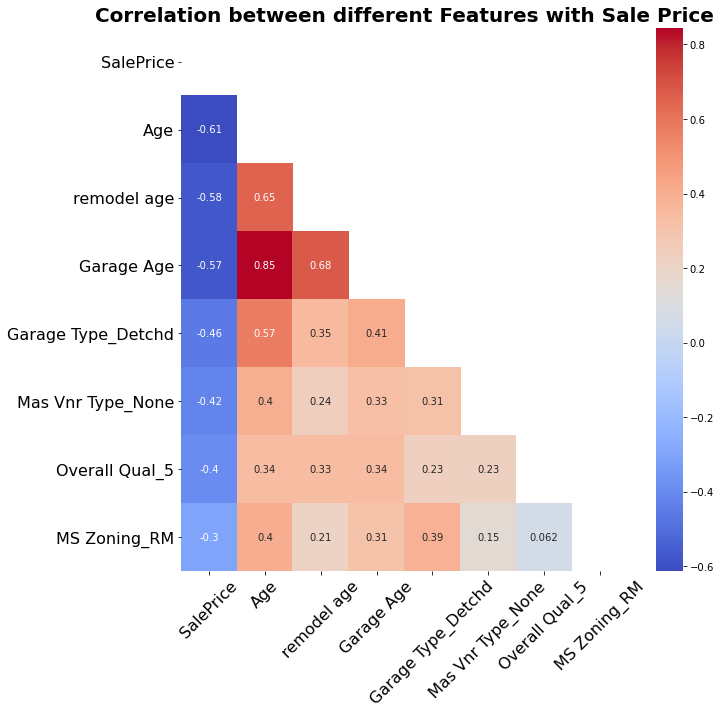

In [104]:
plt.figure(figsize=(10, 10))# define the mask to set the values in the upper triangle to True
data=train_df[['SalePrice','Age','remodel age','Garage Age','Garage Type_Detchd',
              'Mas Vnr Type_None','Overall Qual_5', 'MS Zoning_RM' ]]
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), 
                      mask=mask, vmin=None, vmax=None, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation between different Features with Sale Price',fontsize=20,fontweight="bold" )

plt.yticks(fontsize=16);
plt.xticks(fontsize=16, rotation=45);


In [105]:
train_df.corr()['SalePrice'].sort_values(ascending = False)[0:10]

SalePrice        1.000000
Exter Qual       0.714073
Gr Liv Area      0.700067
Kitchen Qual     0.689965
Bsmt Qual        0.666620
Garage Cars      0.651113
Garage Area      0.638958
Total Bsmt SF    0.615309
Year Built       0.612707
1st Flr SF       0.594937
Name: SalePrice, dtype: float64

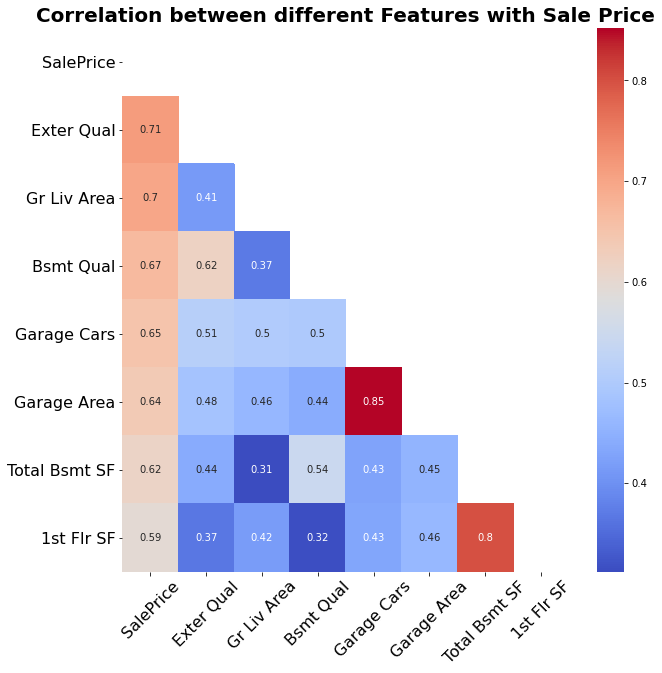

In [106]:
plt.figure(figsize=(10, 10))# define the mask to set the values in the upper triangle to True
data=train_df[['SalePrice','Exter Qual','Gr Liv Area','Bsmt Qual','Garage Cars',
              'Garage Area','Total Bsmt SF', '1st Flr SF' ]]
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), 
                      mask=mask, vmin=None, vmax=None, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation between different Features with Sale Price',fontsize=20,fontweight="bold" )

plt.yticks(fontsize=16, rotation=0)
plt.xticks(fontsize=16, rotation=45);


In [107]:
    
features = [
# 'Exter Qual',
 'Exter Cond',
 'Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Gr Liv Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
    'Garage Cars',
    
    'Foundation',
    'Exter Qual' , 
    'Bsmt Qual', 
    'Bsmt Cond',    
    'Bsmt Exposure',
    'BsmtFin Type 1', 
    'Heating QC',  
    'Kitchen Qual',
    'Garage Finish',  
    'Paved Drive',  
    'Fence',   
    
 'Overall Qual_3',
 'Overall Qual_4',
 'Overall Qual_5',
 'Overall Qual_6',
 'Overall Qual_7',
#  'Overall Qual_8',
 'Overall Qual_9',
 'Overall Qual_10',
#  'Overall Cond_2',
 'Overall Cond_3',
 'Overall Cond_4',
 'Overall Cond_5',
 'Overall Cond_6',
 'Overall Cond_7',
 'Overall Cond_8',
    
'MS SubClass_30',
 'MS SubClass_40',
 'MS SubClass_45',
 'MS SubClass_50',
 'MS SubClass_60',
 'MS SubClass_70',
 'MS SubClass_75',
 'MS SubClass_80',
 'MS SubClass_85',
 'MS SubClass_90',
 'MS SubClass_120',
 'MS SubClass_160',
 'MS SubClass_180',
 'MS SubClass_190',

'Age',
'remodel age',
'Garage Age',
'Garage Type_Detchd',
'Mas Vnr Type_None', 
    
'MS Zoning_FV',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',  
    
'House Style_1.5Unf',
 'House Style_1Story',
 'House Style_2.5Fin',
 'House Style_2.5Unf',
 'House Style_2Story',
 'House Style_SFoyer',
 'House Style_SLvl', 

'Neighborhood_Edwards',    
'Neighborhood_IDOTRR'  ,   
'Neighborhood_NAmes' ,     
'Neighborhood_NoRidge' ,   
'Neighborhood_NridgHt'  ,  
'Neighborhood_OldTown' ,   
'Neighborhood_Sawyer'   ,  
'Neighborhood_Somerst'  ,  
'Neighborhood_StoneBr'   , 
   'SalePrice' 

]



In [108]:
abs(train_df[features].corr()['SalePrice']).sort_values(ascending=False)[0:50]#.sort_index()

SalePrice               1.000000
Exter Qual              0.714073
Gr Liv Area             0.700067
Kitchen Qual            0.689965
Bsmt Qual               0.666620
Garage Cars             0.651113
Age                     0.612980
remodel age             0.577544
Garage Age              0.574633
Garage Finish           0.547703
Foundation              0.537057
Heating QC              0.477960
Mas Vnr Area            0.457653
Garage Type_Detchd      0.456092
BsmtFin SF 1            0.447033
Overall Qual_9          0.443806
Neighborhood_NridgHt    0.431492
Mas Vnr Type_None       0.422498
Open Porch SF           0.397025
Overall Qual_5          0.395858
Overall Cond_5          0.394122
MS SubClass_60          0.393561
Bsmt Exposure           0.388069
BsmtFin Type 1          0.385493
Lot Area                0.353792
Lot Frontage            0.342376
Wood Deck SF            0.312427
MS Zoning_RM            0.295798
Overall Qual_4          0.276058
Paved Drive             0.254980
Neighborho

In [109]:
    
features = [
 'Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Gr Liv Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
    'Garage Cars',
    
    'Foundation',
    'Exter Qual' , 
    'Bsmt Qual', 
    'Bsmt Cond',    
    'Bsmt Exposure',
    'BsmtFin Type 1', 
    'Heating QC',  
    'Kitchen Qual',
    'Garage Finish',  
    'Paved Drive',  
    'Fence',   
    
 

'Age',
'remodel age',
'Garage Age',
'Garage Type_Detchd',
'Mas Vnr Type_None', 
    

    
]



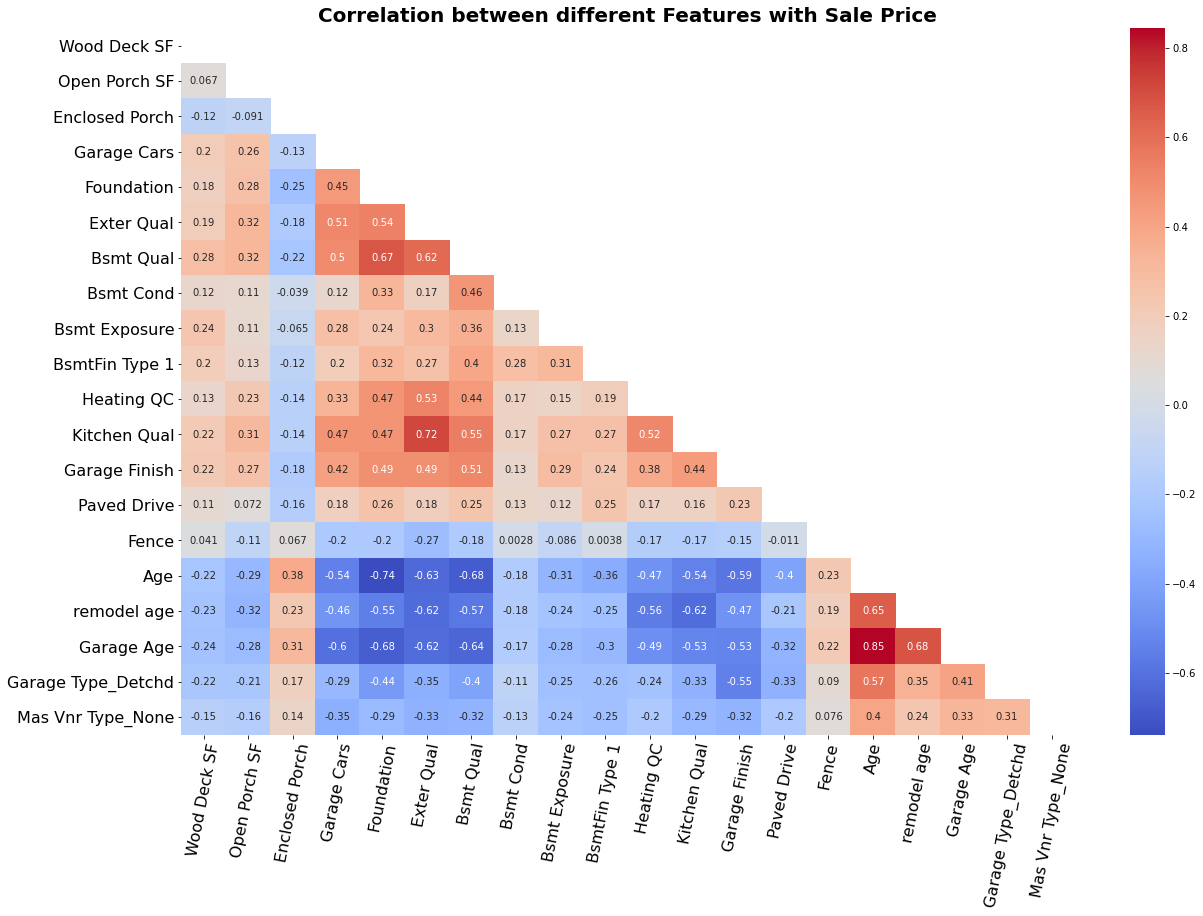

In [110]:
plt.figure(figsize=(20, 13))# define the mask to set the values in the upper triangle to True
data=train_df[features[-20::]]
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), 
                      mask=mask, vmin=None, vmax=None, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation between different Features',fontsize=14)

heatmap.set_title('Correlation between different Features with Sale Price',fontsize=20,fontweight="bold" )

plt.yticks(fontsize=16, rotation=0)
plt.xticks(fontsize=16, rotation=79);

In [111]:
# Garage Finish           0.548545
# Foundation              0.534570
# Mas Vnr Area            0.482204

features = [
 'Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Gr Liv Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
    'Garage Cars',
    
    'Foundation',
    'Exter Qual' , 
    'Bsmt Qual', 
    'Bsmt Cond',    
    'Bsmt Exposure',
    'BsmtFin Type 1', 
    'Heating QC',  
    'Kitchen Qual',
    'Garage Finish',  
#     'Paved Drive',  
#     'Fence',   
    
 'Overall Qual_3',
 'Overall Qual_4',
 'Overall Qual_5',
 'Overall Qual_6',
 'Overall Qual_7',
 'Overall Qual_9',
 'Overall Qual_10',
    
#  'Overall Cond_3',
#  'Overall Cond_4',
#  'Overall Cond_5',
#  'Overall Cond_6',
#  'Overall Cond_7',
#  'Overall Cond_8',
    
# 'MS SubClass_30',
#  'MS SubClass_40',
#  'MS SubClass_45',
#  'MS SubClass_50',
#  'MS SubClass_60',
#  'MS SubClass_70',
#  'MS SubClass_75',
#  'MS SubClass_80',
#  'MS SubClass_85',
#  'MS SubClass_90',
#  'MS SubClass_120',
#  'MS SubClass_160',
#  'MS SubClass_180',
#  'MS SubClass_190',

'Age',
'remodel age',
'Garage Age',
# 'Garage Type_Detchd',
# 'Mas Vnr Type_None', 
    
# 'MS Zoning_FV',
#  'MS Zoning_RH',
#  'MS Zoning_RL',
#  'MS Zoning_RM',  
    
# 'House Style_1.5Unf',
#  'House Style_1Story',
#  'House Style_2Story',
#  'House Style_SFoyer',
#  'House Style_SLvl', 

# 'Neighborhood_Edwards',    
# 'Neighborhood_IDOTRR'  ,   
# 'Neighborhood_NAmes' ,     
# 'Neighborhood_NoRidge' ,   
# 'Neighborhood_NridgHt'  ,  
# 'Neighborhood_OldTown' ,   
# 'Neighborhood_Sawyer'   ,  
# 'Neighborhood_Somerst'  ,  
# 'Neighborhood_StoneBr'   , 
    
]



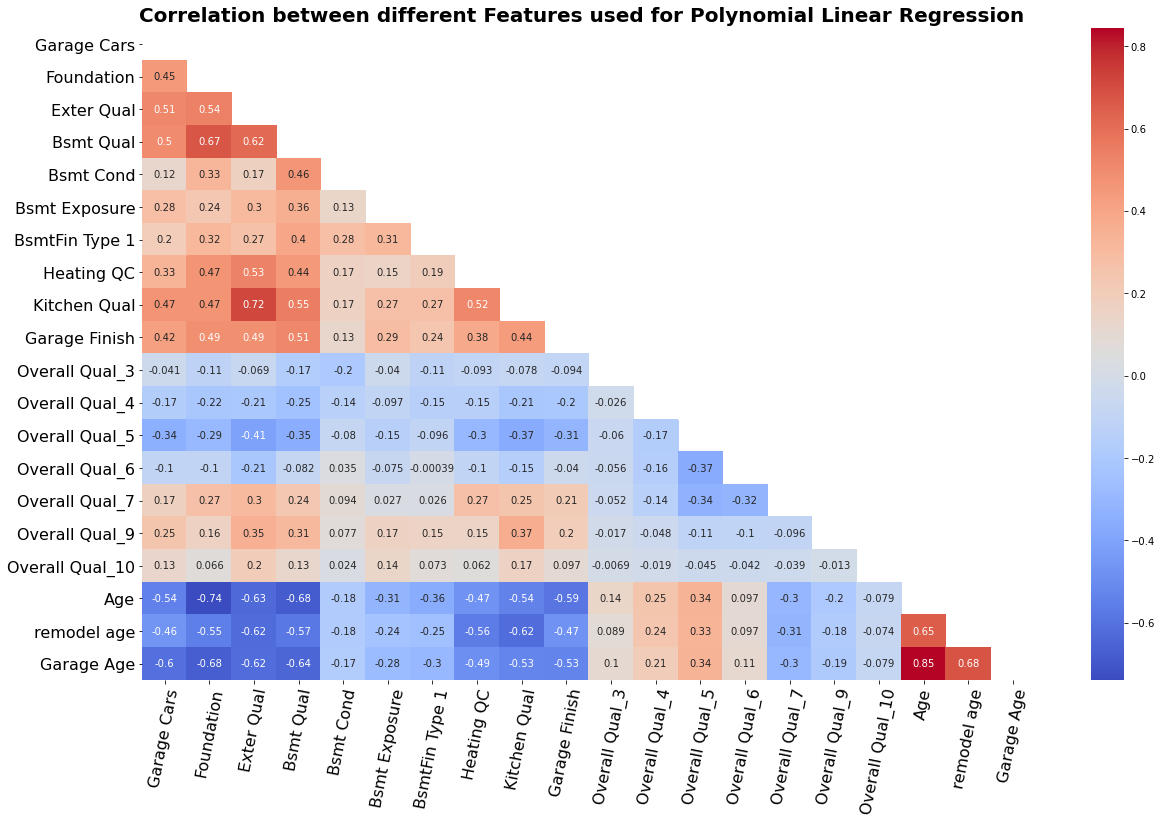

In [112]:
plt.figure(figsize=(20, 12))# define the mask to set the values in the upper triangle to True
data=train_df[features[-20::]]
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), 
                      mask=mask, vmin=None, vmax=None, annot=True, cmap='coolwarm')

heatmap.set_title('Correlation between different Features used for Polynomial Linear Regression  ',fontsize=20,fontweight="bold" )

plt.yticks(fontsize=16, rotation=0)
plt.xticks(fontsize=16, rotation=79);

''

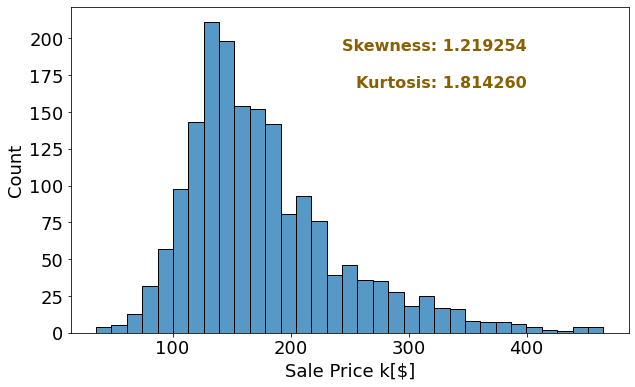

In [113]:
plt.figure(figsize=(10,6))
sns.histplot( train_df['SalePrice']/1000 )
plt.text(x=400, y=200, s="Skewness: %f" % train_df['SalePrice'].skew(),\
        fontweight='demibold', fontsize=16, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.text(x=400, y=175, s="Kurtosis: %f" % train_df['SalePrice'].kurt(),\
        fontweight='demibold', fontsize=16, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.xlabel('Sale Price k[$]',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
;